In [78]:
import numpy as nmp 
import matplotlib.pyplot as plt
import pandas as pd  
import seaborn as sns

In [79]:
#Importing data
df = pd.read_csv('./suv_data.csv')

In [80]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [82]:
#Getting independent and dependent variable  
x= df.iloc[:, [2,3]].values  
y= df.iloc[:, 4].values  

In [83]:
#Getting independent and dependent variable  (another way)
#x= df[['Age','EstimatedSalary']]
#y= df[['Purchased']].values
# With these way we keep the output as a DataFrame in the code above we keep the output as a Numpy array

In [84]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)  
#I tried so many differen random_state values but the best accuracy i got is 0.

In [85]:
from sklearn.preprocessing import StandardScaler   
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)   

In [86]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train) 
y_pred= classifier.predict(x_test)   

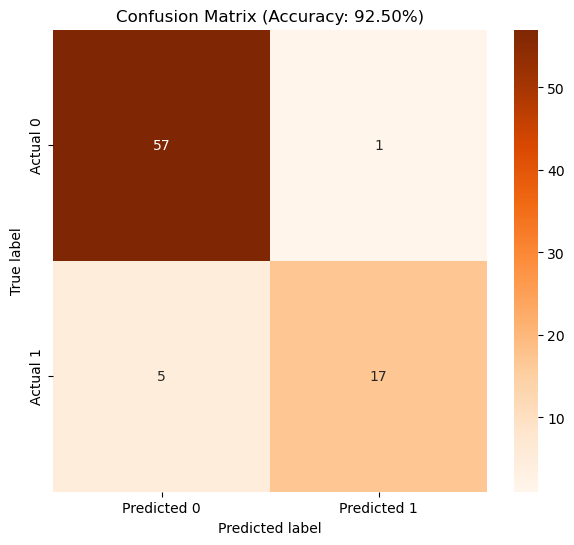

In [87]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=True, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title(f'Confusion Matrix (Accuracy: {accuracy * 100:.2f}%)')
plt.show()